In [1]:
import pandas as pd 

df = pd.read_json("scores.jsonl", lines=True)

In [3]:
item = df.iloc[0]

In [7]:
df.head()

,survey_id,survey_title,section_title,section_text_in_survey,citations,generated_section_text,score,scores
0,2011.06801v1,A Comprehensive Survey on Deep Music Generatio...,Datasets::MIDI,"As introduced in Section 3, MIDI is a descrip...","{'bibrefs': ['BIBREF199', 'BIBREF315', 'BIBREF...",{'gpt-3.5-turbo': {'text': 'Datasets - MIDI M...,3.95,"[4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
1,2309.15402v1,A Survey of Chain of Thought Reasoning: Advanc...,Discussion::Comparison between Verification/Re...,Numerous parallels exist between planning meth...,"{'bibrefs': ['BIBREF16', 'BIBREF80', 'BIBREF81...",{'gpt-3.5-turbo': {'text': 'Discussion - Compa...,4.00,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
2,2309.15402v1,A Survey of Chain of Thought Reasoning: Advanc...,Methods::XoT Structural Variants::Tree Structure,The original chain structure inherently limits...,"{'bibrefs': ['BIBREF16', 'BIBREF80', 'BIBREF14...",{'gpt-3.5-turbo': {'text': 'Methods - XoT Stru...,4.00,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
3,2105.03075v5,A Survey of Data Augmentation Approaches for NLP,Applications::Adversarial Examples (AVEs),Adversarial examples can be generated using in...,"{'bibrefs': ['BIBREF92', 'BIBREF90', 'BIBREF89...",{'gpt-3.5-turbo': {'text': 'Applications - Adv...,4.00,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
4,2105.03075v5,A Survey of Data Augmentation Approaches for NLP,Applications::Few-Shot Learning,DA methods can ease few-shot learning by addin...,"{'bibrefs': ['BIBREF21', 'BIBREF88', 'BIBREF87...",{'gpt-3.5-turbo': {'text': 'Applications - Few...,4.00,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."


In [11]:
item["generated_section_text"]["gpt-3.5-turbo"]["text"]

'Datasets - MIDI\n\nMIDI (Musical Instrument Digital Interface) is a widely used format for representing music in a digital form. MIDI datasets have played a crucial role in advancing deep music generation research. In this section, we discuss several notable MIDI datasets that have been used for deep music generation tasks.\n\nThe KernScores dataset [REF0] contains classical music in a Humdrum format and is obtained through an optical music recognition system. It provides a valuable resource for studying classical music composition and analysis. Another dataset, Kunstderfuge [REF0], includes solo piano and non-solo piano works of 598 composers. The piano-midi.de, classical archives, and Kunstderfuge datasets are entered using a MIDI sequencer and are not played by pianists [REF0].\n\nThe MAPS dataset [REF0] utilizes MIDI files from Piano-midi.de to render real recordings by playing back the MIDI files on a Yamaha Disklavier. This dataset enables researchers to explore the relationship

In [9]:
from argparse import ArgumentParser
from dotenv import load_dotenv
from openai import OpenAI
import json, os
from tqdm import tqdm
import pandas as pd
from instructor import OpenAISchema
from pydantic import BaseModel, Field, conint, field_validator,confloat
from typing import List

class ChecklistItem(BaseModel):
    number: conint(ge=1) = Field(..., description="The item number")
    text: str = Field(..., description="The text of the checklist item")

class from argparse import ArgumentParser
from dotenv import load_dotenv
from openai import OpenAI
import json, os
from tqdm import tqdm
import pandas as pd
from instructor import OpenAISchema
from pydantic import BaseModel, Field, conint, field_validator,confloat
from typing import List

class ChecklistItem(BaseModel):
    number: conint(ge=1) = Field(..., description="The item number")
    text: str = Field(..., description="The text of the checklist item")

class Checklist(OpenAISchema):
    items: List[ChecklistItem] = Field(..., description="The checklist items")

    def to_json(self):
        return json.dumps(self.dict(), indent=4)(OpenAISchema):
    items: List[ChecklistItem] = Field(..., description="The checklist items")

    def to_json(self):
        return json.dumps(self.dict(), indent=4)

In [10]:
Checklist.openai_schema

{'name': 'Checklist',
 'description': 'Correctly extracted `Checklist` with all the required parameters with correct types',
 'parameters': {'$defs': {'ChecklistItem': {'properties': {'number': {'description': 'The item number',
      'minimum': 1,
      'title': 'Number',
      'type': 'integer'},
     'text': {'description': 'The text of the checklist item',
      'title': 'Text',
      'type': 'string'}},
    'required': ['number', 'text'],
    'title': 'ChecklistItem',
    'type': 'object'}},
  'properties': {'items': {'description': 'The checklist items',
    'items': {'$ref': '#/$defs/ChecklistItem'},
    'title': 'Items',
    'type': 'array'}},
  'required': ['items'],
  'type': 'object'}}

In [12]:
import pandas as pd

In [79]:
df = pd.read_json("v3_evaluated_gpt-4-1106-preview_merged_scores.jsonl", lines=True)

<Axes: >

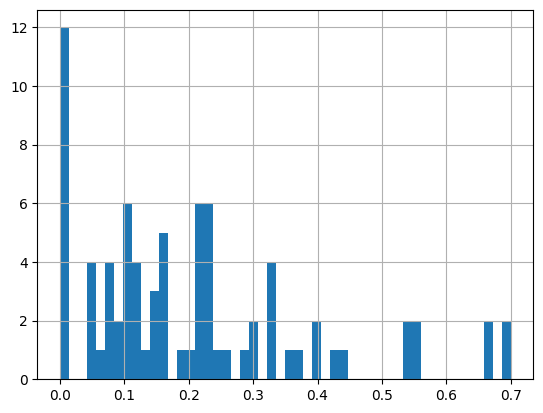

In [80]:
import matplotlib.pyplot as plt

df["score_checkeval"].hist(bins=50)

In [81]:
df["score_checkeval"].describe()

count    79.000000
mean      0.208461
std       0.180579
min       0.000000
25%       0.083333
50%       0.166667
75%       0.292857
max       0.700000
Name: score_checkeval, dtype: float64

In [82]:
item = df[df["score_checkeval"] == 0.0].iloc[0]

In [83]:
candidate = item["generated_section_text"]["gpt-3.5-turbo"]["text"]
references = item["generated_section_text"]["gpt-3.5-turbo"]["references_sent_to_gpt"]

In [84]:
import re

def replace_placeholder(match, references=references):
    index = int(match.group(1))  # Extract the index from the placeholder
    return references[index]["bibref"]  # Return the corresponding reference

# Regular expression pattern to match 'REF{i}'
pattern = r'REF(\d+)'

# Replace all occurrences of the pattern in 'candidate'
candidate = re.sub(pattern, replace_placeholder, candidate)

In [85]:
print(candidate)

Discussions and Future Directions - Robustness to Noise

Robustness to noise is a crucial aspect of natural language processing (NLP) models, as real-world text data often contains various forms of noise, such as typos, misspellings, and grammatical errors. Transformer-based pretrained models have shown remarkable performance in NLP tasks, but their robustness to noise remains a challenge. In this section, we discuss the impact of noise on transformer-based models and explore potential future directions to improve their robustness.

One important aspect to consider is the effect of noise on question answering (QA) systems. In a study by BIBREF290, it was found that even a single typo in the questions can significantly decrease the performance of QA models. This suggests that transformer-based QA systems are more brittle compared to sentiment classifiers based on BERT, as mentioned in BIBREF290. The robustness of NLP systems depends not only on the learning algorithm but also on the spe